# 멀티 프로세스를 이용하여 병렬로 처리하려면? ― multiprocessing

In [1]:
import time


def heavy_work(name):
    result = 0
    for i in range(4000000):
        result += i
    print('%s done' % name)


start = time.time()

for i in range(4):
    heavy_work(i)

end = time.time()

print("수행시간: %f 초" % (end - start))


0 done
1 done
2 done
3 done
수행시간: 0.457956 초


In [2]:
import time


def heavy_work(name):
    result = 0
    for i in range(4000000):
        result += i
    print('%s done' % name)


if __name__ == '__main__':
    import threading

    start = time.time()
    threads = []
    for i in range(4):
        t = threading.Thread(target=heavy_work, args=(i, ))
        t.start()
        threads.append(t)

    for t in threads:
        t.join()  # 스레드가 종료될 때까지 대기

    end = time.time()

    print("수행시간: %f 초" % (end - start))


0 done
2 done
1 done
3 done
수행시간: 0.456155 초


이처럼 스레드는 CPU 연산만 수행할 때는 수행 시간 단축에 그리 도움이 되지 않음을 알 수 있다.

> 파이썬 스레드는 메모리 관리를 위해 하나의 스레드만이 파이썬 객체에 접근할 수 있도록 제한하는데, '이것을 GIL(Global Interpreter Lock)이라 한다. 이러한 이유로 스레드는 **GIL에 영향을 받지 않는 I/O가 주로 발생하는 네트워크 통신 또는 파일 읽고 쓰기와 같은 작업에 유리**하다.

#### threading 모듈 대신 multiprocessing 모듈을 사용 

mul_proc.py 참고 

In [ ]:
import time
import multiprocessing


def heavy_work(name):
    result = 0
    for i in range(4000000):
        result += i
    print(f'{name} done')


if __name__ == '__main__':
    start = time.time()
    procs = []

    # 4개의 프로세스 생성 및 시작
    for i in range(4):
        p = multiprocessing.Process(target=heavy_work, args=(f'Process {i}',))
        p.start()
        procs.append(p)

    # 모든 프로세스가 끝날 때까지 대기
    for p in procs:
        p.join()

    end = time.time()
    print("수행시간: %f 초" % (end - start))

---
---
---

# multiprocessing.Pool

- 멀티프로세싱은 여러 개의 독립적인 프로세스를 생성하여 각각의 프로세스가 병렬로 작업하도록 하는 방식이다. 각 프로세스는 독립적인 메모리 공간을 가지며, 프로세스 간 통신 (Inter-Process Communication, IPC) 메커니즘을 통해 데이터를 교환할 수 있다.

- 파이썬에서 멀티프로세싱을 구현하기 위해 사용되는 주요 모듈은 multiprocessing이다. multiprocessing 모듈은 파이썬에서 다중 프로세스를 사용하여 병렬 작업을 수행하는 데 도움이 되는 도구를 제공하는데, threading 모듈과 달리 G**lobal Interpreter Lock (GIL)의 영향을 받지 않으므로 CPU-bound 작업에 효과적**이다.

- multiprocessing.Pool 클래스는 멀티프로세싱을 쉽게 구현할 수 있도록 도와주는 클래스로, 간단한 코드로 여러 작업을 병렬로 실행할 수 있다. Pool 클래스는 여러 프로세스를 생성하고 관리하며, 작업을 이들 프로세스에 분산하여 처리한다.

- Pool 클래스의 중요한 메서드 중 하나는 map 메서드인데, 이는 입력 데이터를 여러 프로세스에 분산하고 각각의 프로세스에서 주어진 함수를 수행한 후 결과를 수집하는 역할을 한다. 각 입력에 대한 결과는 입력 순서대로 반환된다.

- multiprocessing.Pool(processes=None, initializer=None, initargs=())
    - processes: 생성할 프로세스의 개수. 기본값은 CPU 코어의 개수
    - initializer: 각 프로세스가 시작될 때 호출할 초기화 함수
    - initargs: 초기화 함수에 전달할 인수들의 튜플
 

- pool.map(func, iterable, chunksize=None)
    - func: 각 입력에 대해 실행할 함수
    - iterable: 함수에 전달할 입력 데이터
    - chunksize: 각 프로세스에 할당되는 데이터 묶음의 크기. 크기가 작을수록 작은 덩어리로 나누어지며, 이는 작은 작업들이 빠르게 완료될 때 유용하다.


In [ ]:
import time
import multiprocessing

def my_function(number):
    result = 1
    for _ in range(number):
        result = result ** 2
    return result

def run_single_process(number):
    start_time = time.time()

    for _ in range(number):
        my_function(number)

    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Single process - Elapsed Time: {elapsed_time} seconds")

def run_with_multiprocessing(number, num_processes):
    start_time = time.time()

    with multiprocessing.Pool(processes=num_processes) as pool:
        pool.map(my_function, [number] * num_processes)

    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"With multiprocessing - Elapsed Time: {elapsed_time} seconds")

if __name__ == "__main__":
    number_to_process = 1000
    num_processes = 4

    print("Running with single process:")
    run_single_process(number_to_process)

    print("\nRunning with multiprocessing:")
    run_with_multiprocessing(number_to_process, num_processes)

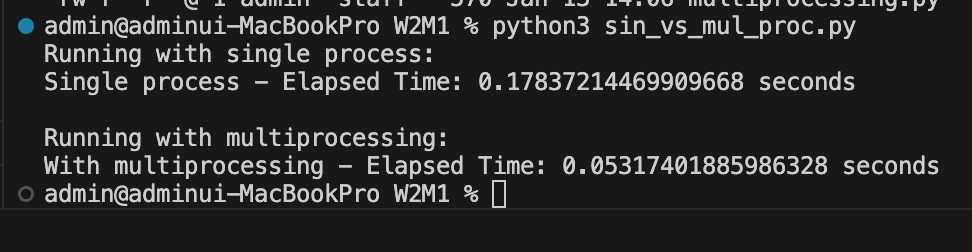

프로세스에 잘 분배를 해줘야함 ==> 한 프로세스에만 과부하가 올 수 있음

---
---
---